In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

## Formatting

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth} \\usepackage{type1cm}"

## Cleaning

In [5]:
sample_df = pd.read_csv("data/sample_auxiliary.csv", header = 0, index_col = 0)
matrix_df = pd.read_csv("data/series_matrix.csv", index_col = 0)

The merged dataframe below contains all of the roughly 22K gene expression levels,
and the age/packyear features, and the label of if they have cancer or not.

I dropped rows that do not contain age/packyears, but this can be changed if we want to. I then split the data into a 60% train set (97 samples) and a 40% test set (66 samples).

In [6]:
mdf = pd.concat((sample_df[["cancer", "age", "packyears"]], matrix_df), axis = 1)

mdf = mdf.dropna()
mdf.head()

,cancer,age,packyears,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,...,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at
geoid,,,,,,,,,,,,,,,,,,,,,
GSM93997,0,34.0,17.0,10.696879,4.236170,5.345251,7.919187,3.478706,7.142456,4.814028,...,8.113917,7.373103,3.232875,5.466897,5.952681,5.102564,5.499590,5.209175,7.569331,6.747730
GSM94019,1,63.0,75.0,10.560653,4.173343,5.788414,8.180133,3.745022,7.667475,5.254227,...,8.353391,7.714989,3.491614,5.597842,6.394273,5.452602,5.669695,4.375323,8.200798,7.133049
GSM94021,1,69.0,70.0,10.299866,4.359738,5.583276,8.213886,3.653105,7.509800,5.103016,...,8.221291,7.253566,3.333656,5.259695,6.299795,5.622406,5.984586,4.613341,7.427216,7.121853
GSM94022,1,61.0,80.0,10.467122,4.245888,5.785865,8.184135,3.718874,7.588953,5.233377,...,8.297687,7.898104,3.511188,5.409353,6.276960,5.445675,5.611665,4.369342,8.122028,7.201006
GSM94023,1,49.0,20.0,10.234799,4.537967,5.881467,8.022470,3.578695,7.692626,4.957821,...,8.242604,8.189139,3.289676,5.617069,6.064206,5.924520,6.020903,4.530274,8.119425,7.013346


In [7]:
train_df, test_df = sklearn.model_selection.train_test_split(mdf, test_size = 0.4, random_state = 12345)

In [8]:
(train_df.shape[0], test_df.shape[0])

(97, 66)

## PCA

Running PCA and basic visualization on the training set alone. Using both the age/packyear traits, and the gene probe levels as features. Performed mean/variance standardization before feeding into the sklearn PCA algorithm.

In [9]:
x = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values

In [10]:
x = StandardScaler().fit_transform(x)

### 2 Component

In [29]:
k = 2

pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(x)

print("Explained variance: {}".format(pca.explained_variance_ratio_))

Explained variance: [0.27562634 0.08977701]


In [30]:
pca_df = pd.DataFrame(data = pca_fit, columns = ['pc1', 'pc2'], index = train_df.index)
pca_df = pd.concat([train_df["cancer"], pca_df], axis = 1)

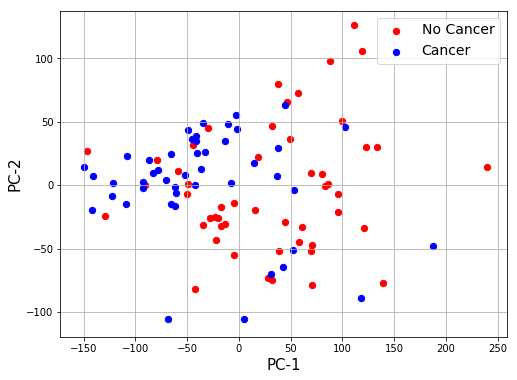

In [31]:
fig = plt.figure(figsize = (8,6))


ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)

colors = ['r', 'b']
targets = [0, 1]

for target, color in zip(targets,colors):
    idx = pca_df['cancer'] == target
    ax.scatter(pca_df.loc[idx, 'pc1'], pca_df.loc[idx, 'pc2'], c = color, s = 40)
ax.legend(["No Cancer", "Cancer"])
ax.grid()

plt.savefig("images/pca_2comp.pdf")

### Variance Test

In [104]:
var = 0
k = 1

while var < 0.9:
    pca = PCA(n_components = k)
    pca_fit = pca.fit_transform(x)
    var = np.sum(pca.explained_variance_ratio_)
    
    print("Variance explained by k = {}: {}".format(k, var))
    
    k+=5

Variance explained by k = 1: 0.2756263368810686
Variance explained by k = 6: 0.53799152482042
Variance explained by k = 11: 0.6324598489082148
Variance explained by k = 16: 0.6850323354699168
Variance explained by k = 21: 0.7247369799795288
Variance explained by k = 26: 0.7589467738600025
Variance explained by k = 31: 0.787634337717961
Variance explained by k = 36: 0.8127994018129387
Variance explained by k = 41: 0.8349754620511707
Variance explained by k = 46: 0.855430545031857
Variance explained by k = 51: 0.8744734818761076
Variance explained by k = 56: 0.8922848249982038
Variance explained by k = 61: 0.9090107990806814


### Many Component

Seeing if a heatmap distinguishes between the classes when using all the features (gene probes) and running PCA to retain the majority of the samle variance.

It looks like the cancer = 1 samples are "lighter" on the PCA heatmap, but it isnt a very telling disguisher. I feel like feature selection on the initial gene probes could be very beneficial for this, so we can possibly use less PCA components to better distinguish the classes when we look at the proper genes subset from the get-go?

In [80]:
k = 75

pca = PCA(n_components = k)
pca_fit = pca.fit_transform(x)

print("Explained variance: {}".format(np.sum(pca.explained_variance_ratio_)))

Explained variance: 0.9510054763877631


In [81]:
pca_df = pd.DataFrame(data = pca_fit, index = train_df.index)
pca_df = pd.concat([train_df["cancer"], pca_df], axis = 1)

In [82]:
pca0 = pca_df[pca_df["cancer"] == 0].values[:,1::]
pca1 = pca_df[pca_df["cancer"] == 1].values[:,1::]

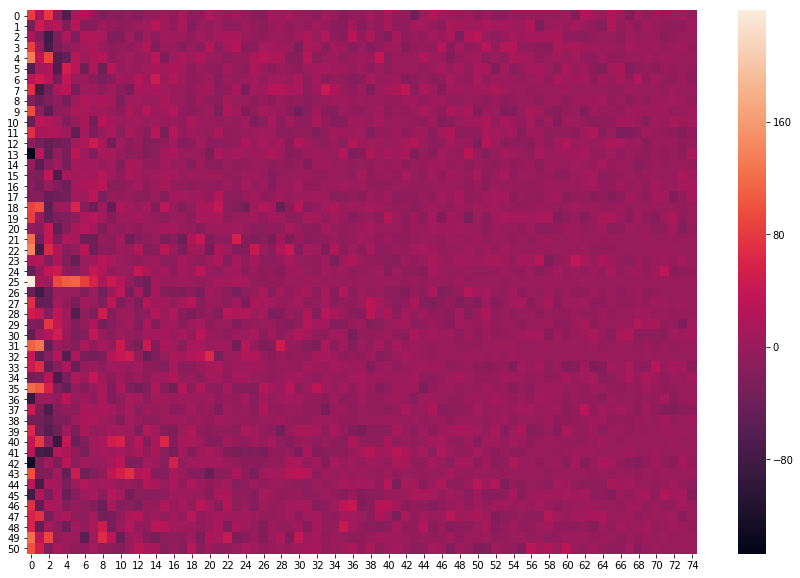

In [83]:
fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(pca0, ax = ax)

plt.show()

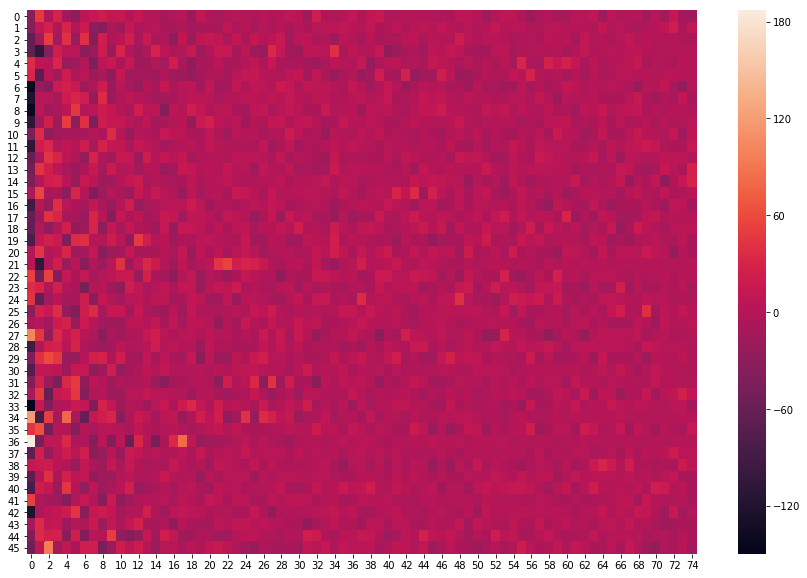

In [84]:
fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(pca1, ax = ax)

plt.show()